In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# load MNIST dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

# Using an MLP with a hidden layer to predict the number in an image

In [12]:
# create a MLP model to predict the number in the image
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())


# loss function for the MLP model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# compile model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [13]:
# train model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

2024-11-18 09:00:48.798528: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


/home/micheal/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8609 - loss: 0.4790

2024-11-18 09:01:18.375758: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.8609 - loss: 0.4788 - val_accuracy: 0.9592 - val_loss: 0.1391
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9547 - loss: 0.1536 - val_accuracy: 0.9687 - val_loss: 0.1000
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9679 - loss: 0.1102 - val_accuracy: 0.9735 - val_loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9741 - loss: 0.0883 - val_accuracy: 0.9744 - val_loss: 0.0780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9771 - loss: 0.0767 - val_accuracy: 0.9755 - val_loss: 0.0801
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9795 - loss: 0.0626 - val_accuracy: 0.9766 - val_loss: 0.0742
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9818 - loss: 0.0559 - val_accuracy: 0.9791 - val_loss: 0.0697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9822 - loss: 0.05

In [49]:
# test model with an image from the testing dataset
image_num = 16 # from 0 to 10000

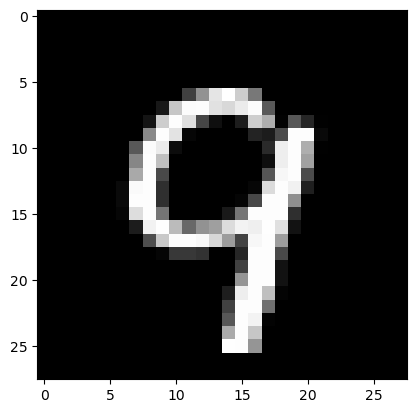

In [51]:
# First print the image the models is going to try and predict
plt.imshow(x_test[image_num], cmap='gray')
plt.show()

In [53]:
# Now see what it is the model's prediction
print("MLP Prediction: " + str(np.argmax(model.predict(tf.expand_dims(x_test[image_num], axis=0)))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
MLP Prediction: 9


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

### in the previous cell we can see that when using an MLP for images we have a lot of training parameters which can result in a problem for bigger images.

# Now, let's use a CNN to predict the number in the image

In [20]:
cnn_x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
cnn_x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

cnn_x_train = cnn_x_train.astype('float32')/255.0
cnn_x_test = cnn_x_test.astype('float32')/255.0

In [21]:
# create CNN architecture 3 Convolution layers + a Flatten layers + Fully Connected layer 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn.add(tf.keras.layers.Dropout(0.3))
# cnn.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
# cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(10))
cnn.add(tf.keras.layers.Softmax())

# loss function
cnn_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# compile model
cnn.compile(optimizer='adam', loss=cnn_loss_fn, metrics=['accuracy'])

/home/micheal/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.fit(cnn_x_train, y_train, epochs=10, validation_data=(cnn_x_test, y_test))

Epoch 1/10


2024-11-18 09:05:31.184215: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 49ms/step - accuracy: 0.4780 - loss: 1.4892 - val_accuracy: 0.9166 - val_loss: 0.2889
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9085 - loss: 0.3101 - val_accuracy: 0.9510 - val_loss: 0.1765
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9372 - loss: 0.2103 - val_accuracy: 0.9639 - val_loss: 0.1264
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9457 - loss: 0.1766 - val_accuracy: 0.9693 - val_loss: 0.1067
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 59ms/step - accuracy: 0.9537 - loss: 0.1546 - val_accuracy: 0.9727 - val_loss: 0.0934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 60ms/step - accuracy: 0.9588 - loss: 0.1416 - val_accuracy: 0.9732 - val_loss: 0.0846
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 55ms/step - accuracy: 0.9616 - loss: 0.1264 - val_accuracy: 0.9761 - val_loss: 0.0800
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 60ms/step - accuracy: 0.9628 - loss: 

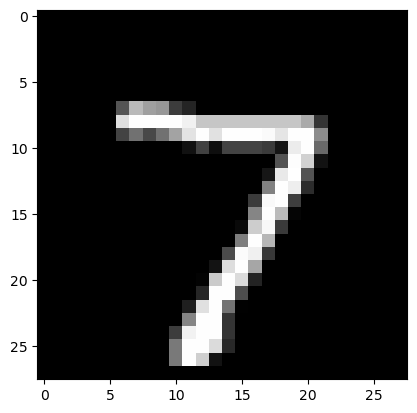

In [23]:
test_prediction_image_num = 0
image = cnn_x_test[test_prediction_image_num]
plt.imshow(image, cmap='gray')

In [24]:
print("CNN Prediction: " + str(np.argmax(cnn.predict(tf.expand_dims(cnn_x_test[test_prediction_image_num], axis=0)))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
CNN Prediction: 7


In [25]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        16,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_3 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)